In [22]:
'''手工实现k_means聚类'''
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#jupyter notebook需要加上该命令
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文=====不要改matplotlib里面的配置
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# 设置matplotlib正常显示中文和负号!!!

In [23]:
###读取数据
# df_data = pd.read_csv('./data/data.csv')
# df_data = pd.read_csv('./data/K-means-input.csv') # 贷款额度划分 聚4类
df_data = pd.read_csv('./data/Peril-X.csv') # 企业风险评估 聚4类===arange里面的114
list2 = []
for i in df_data.values:
    for m in i:
        list2.append(m)
list1 = list(np.arange(114))

[106  42  23  94]
[[106.           1.67565521]
 [ 42.           0.71632982]
 [ 23.           0.57752076]
 [ 94.           1.31349763]]


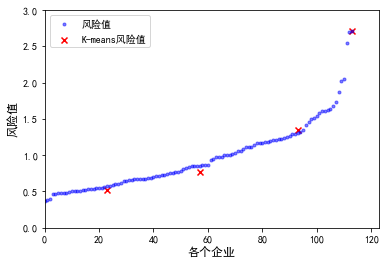

In [41]:
# 第一步，随机选择 K 个点
K         = 4
p_list    = np.stack([list1, list2], axis=1)

index     = np.random.choice(len(p_list), size=K)
print(index)
centeroid = p_list[index]
print(centeroid)

# 以下是画图部分
# for p in centeroid:
#     plt.scatter(p[0], p[1], marker='^')
plt.scatter(23, 0.513, color='red',marker='x',label='K-means风险值')
plt.scatter(57, 0.774, color='red',marker='x')
plt.scatter(93, 1.350, color='red',marker='x')
plt.scatter(113, 2.712, color='red',marker='x')
plt.plot(list1,list2,'.',color='b',alpha=0.5,label='风险值')
plt.legend()
plt.xlim(0, 123)
plt.ylim(0, 3)

plt.xlabel('各个企业',fontsize=12)
plt.ylabel('风险值',fontsize=12)
plt.savefig('./output/风险值聚类.png',dpi = 400)
plt.show()


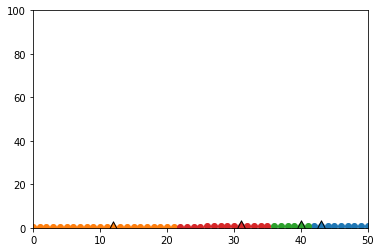

In [10]:
# 第二步，遍历所有点 P，将 P 放入最近的聚类中心的集合中
points_set = {key: [] for key in range(K)}

for p in p_list:
    nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)#得到的是最小值的索引值
    points_set[nearest_index].append(p)

# 以下是画图部分
for k_index, p_set in points_set.items():
    p_xs = [p[0] for p in p_set]
    p_ys = [p[1] for p in p_set]
    plt.scatter(p_xs, p_ys, color='C{}'.format(k_index))#format===格式化输出

for ix, p in enumerate(centeroid):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=128)

plt.xlim(0, 50)
plt.ylim(0, 100)
plt.show()

In [5]:
# 第三步，遍历每一个点集，计算新的聚类中心
for k_index, p_set in points_set.items():
    p_xs = [p[0] for p in p_set]
    p_ys = [p[1] for p in p_set]
    centeroid[k_index, 0] = sum(p_xs) / len(p_set)
    centeroid[k_index, 1] = sum(p_ys) / len(p_set)

ZeroDivisionError: division by zero

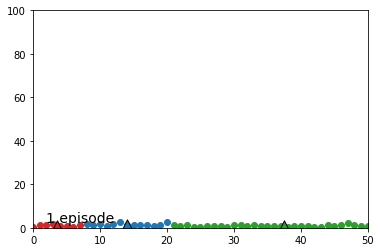

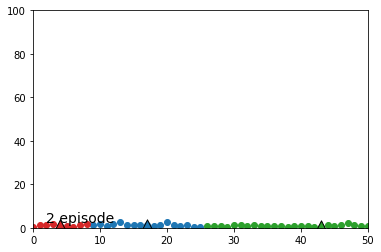

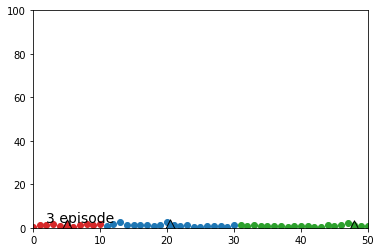

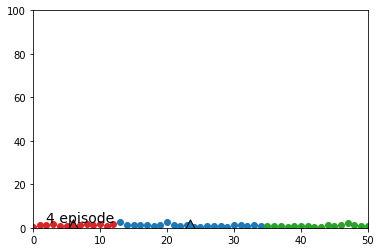

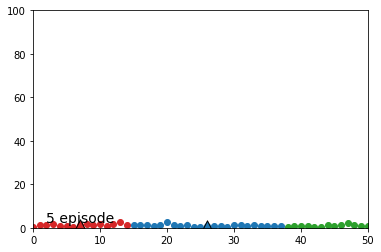

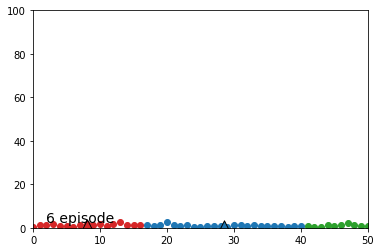

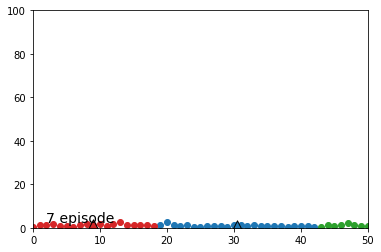

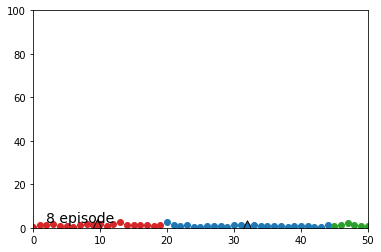

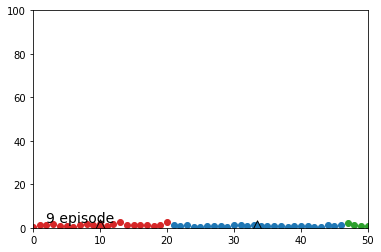

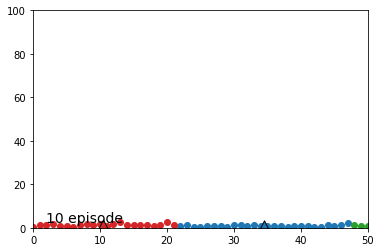

[[34.5         0.86424657]
 [96.          0.81841154]
 [63.          0.99116839]
 [10.5         1.29306137]]


In [6]:
# 第四步，重复进行以上步骤
for i in range(10):
    points_set = {key: [] for key in range(K)}

    for p in p_list:
        nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)
        points_set[nearest_index].append(p)
        
    for k_index, p_set in points_set.items():
        p_xs = [p[0] for p in p_set]
        p_ys = [p[1] for p in p_set]
        centeroid[k_index, 0] = sum(p_xs) / len(p_set)
        centeroid[k_index, 1] = sum(p_ys) / len(p_set)
        
    for k_index, p_set in points_set.items():
        p_xs = [p[0] for p in p_set]
        p_ys = [p[1] for p in p_set]
        plt.scatter(p_xs, p_ys, color='C{}'.format(k_index))

    for ix, p in enumerate(centeroid):
        plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=128)
    
    plt.xlim(0, 50)
    plt.ylim(0, 100)
    plt.annotate('{} episode'.format(i + 1), xy=(2, 2.5), fontsize=14)
    plt.show()

print(centeroid)

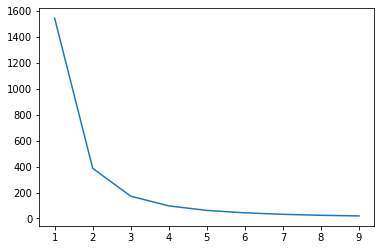

In [7]:
'''利用sklearn库寻找合适的K值===合适的拐点为2'''
from sklearn.cluster import KMeans
loss = []
point_number = 20
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100).fit(p_list)
    loss.append(kmeans.inertia_ / point_number / K)
    
plt.plot(range(1, 10), loss)
plt.show()